## Optimización de Portafolio

In [1]:
#pip install -U yfinance
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
#Configuración de pandas
pd.set_option('display.max_colwidth', None)
pd.set_option('expand_frame_repr', False)

## Optimización de Portafolio

In [3]:
tickers_list = ['AAPL', 'MSFT', 'SQ', 'AMZN']
data = yf.download(tickers_list, '2020-04-27', '2020-10-23')
data.head()

[*********************100%%**********************]  4 of 4 completed


Price       Adj Close                                         Close                                          High              ...         Low                  Open                                        Volume                               
Ticker           AAPL        AMZN        MSFT         SQ       AAPL        AMZN        MSFT         SQ       AAPL        AMZN  ...        MSFT         SQ       AAPL        AMZN        MSFT         SQ       AAPL       AMZN      MSFT        SQ
Date                                                                                                                           ...                                                                                                               
2020-04-27  68.950378  118.800003  167.566635  63.549999  70.792503  118.800003  174.050003  63.549999  71.135002  122.244003  ...  173.300003  61.810001  70.449997  122.160004  176.589996  63.610001  117087600  112912000  33194400  10241700
2020-04-28  67.832741  115.704002  163.484573  61.750000  69.644997  115.704002  169.809998  61.750000  71.457497  118.675003  ...  169.389999  60.900002  71.269997  118.605003  175.589996  64.169998  112004800  105388000  34392700  11852100
2020-04-29  70.060715  118.635498  170.820724  65.769997  71.932503  118.635498  177.429993  65.769997  72.417503  119.594498  ...  171.880005  63.389999  71.182503  116.500504  173.220001  63.439999  137280800   91832000  51286600  14387300
2020-04-30  71.538727  123.699997  172.534393  65.139999  73.449997  123.699997  179.210007  65.139999  73.632500  123.750000  ...  176.229996  64.720001  72.489998  120.991997  180.000000  65.000000  183064000  190692000  53875900  10525900
2020-05-01  70.387001  114.302002  168.067276  63.000000  72.267502  114.302002  174.570007  63.000000  74.750000  118.122002  ...  174.009995  61.439999  71.562500  116.839996  175.800003  62.840000  240616800  195452000  39370500  10042400

[5 rows x 24 columns]

In [4]:
data.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'MSFT'),
            ('Adj Close',   'SQ'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close', 'MSFT'),
            (    'Close',   'SQ'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High', 'MSFT'),
            (     'High',   'SQ'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low', 'MSFT'),
            (      'Low',   'SQ'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open', 'MSFT'),
            (     'Open',   'SQ'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume', 'MSFT'),
            (   'Volume',   'SQ')],
           names=['Price', 'Ticker'])

In [5]:
df_precios = data[['Close']]
df_precios.head()

Price           Close                                   
Ticker           AAPL        AMZN        MSFT         SQ
Date                                                    
2020-04-27  70.792503  118.800003  174.050003  63.549999
2020-04-28  69.644997  115.704002  169.809998  61.750000
2020-04-29  71.932503  118.635498  177.429993  65.769997
2020-04-30  73.449997  123.699997  179.210007  65.139999
2020-05-01  72.267502  114.302002  174.570007  63.000000

In [6]:
df_precios.isnull().sum()

Price  Ticker
Close  AAPL      0
       AMZN      0
       MSFT      0
       SQ        0
dtype: int64

In [7]:
df_precios.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 126 entries, 2020-04-27 to 2020-10-22
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  126 non-null    float64
 1   (Close, AMZN)  126 non-null    float64
 2   (Close, MSFT)  126 non-null    float64
 3   (Close, SQ)    126 non-null    float64
dtypes: float64(4)
memory usage: 4.9 KB


# OBJETIVO:

* Queremos invertir en algunos instrumentos.
<br>

* Necesitamos un criterio para hacerlo.
<br>
* Tradicionalmente, se busca un portafolio que minimice el riesgo, pero esto en ocasiones 
puede no ser muy atractivo.
<br>
* Una enfoque que considera tanto la ganancia por invertir en una serie de activos como el riesgo que uno asume en dicha inversión es el Sharpe Ratio:

$$
SR = \frac{(R_p - R_f)}{\sigma_p}
$$

$R_p$ = Rendimiento de portafolio 

$R_f$ = Tasa libre de riesgo

$\sigma_p$ = Desviación estándar del excedente de rendimiento del portafolio

SR = ($R_p$ - $R_f$)/$\sigma_p$


$R_p = w_1\times r_1+w_2\times r_2+...+w_k\times r_k$, donde $r_i$= rendimiento del activo $i$, y $w_i$ es la proporción que tenemos del instrumento $i$

En términos vectoriales:

$$
R_p = \textbf{w}^{T}\textbf{r} 
$$

In [8]:
rend = df_precios.pct_change().dropna()
rend

Price          Close                              
Ticker          AAPL      AMZN      MSFT        SQ
Date                                              
2020-04-28 -0.016209 -0.026061 -0.024361 -0.028324
2020-04-29  0.032845  0.025336  0.044874  0.065101
2020-04-30  0.021096  0.042690  0.010032 -0.009579
2020-05-01 -0.016099 -0.075974 -0.025891 -0.032852
2020-05-04  0.014149  0.013101  0.024460  0.010952
...              ...       ...       ...       ...
2020-10-16 -0.014001 -0.019750  0.000000 -0.011930
2020-10-19 -0.025542 -0.020014 -0.024766  0.003273
2020-10-20  0.013192  0.003056  0.002007 -0.006525
2020-10-21 -0.005446 -0.009969  0.000699 -0.042640
2020-10-22 -0.009583 -0.002681  0.000419 -0.010629

[125 rows x 4 columns]

In [9]:
rend.mean()*252 #esto es opara anualizarlo

Price  Ticker
Close  AAPL      1.065666
       AMZN      0.652033
       MSFT      0.473356
       SQ        2.208798
dtype: float64

### primero: Usando Simulaciones Monte Carlo


Si yo tengo un vector  $X = (x_1, x_2,...x_n)'$ ; $w = (w_1, w_2, ..., w_n)'$ no aleatoria. Entonces 

$Var(w'X) = w'Cov(X)w $ (es un escalar)


In [10]:
#overview general:

#1. Vamos a generar muchas posibles combinaciones de los pesos w_i
#2. Calcular el Sharpe Ratio (SR) para cada una de ellas
#3. Ver para qué valores de w_i se maximiza.
#4. Ver para qué valores se minimiza la volatilidad.



In [11]:
# Generar los pesos de forma aleatoria:
random_weights = np.array(np.random.random(len(tickers_list)))
norm_weights = random_weights /np.sum(random_weights) #estos pesos están fijos y suman 1

In [12]:
norm_weights

array([0.12082168, 0.1496676 , 0.71176338, 0.01774734])

In [13]:
#calcular el rendimiento 'esperado' del rendimiento anualizado :
exp_ret = np.sum(rend.mean()*norm_weights)*252
exp_ret
#a=np.dot(rend.mean(), norm_weights)*252
#a

0.6024617704907594

In [14]:
#Var(w'X) = w'Var(X)w
vol = np.sqrt(np.dot(norm_weights.T, np.dot(rend.cov()*252,norm_weights)))
                        #sqrt(w'Cov(X)w*252)
vol

0.3057316447431824

In [15]:
#Suponemos que R_f=0
sharpe_ratio = exp_ret/vol
sharpe_ratio


1.9705574507893462

## Desarrollo Simulación

In [16]:
rend

Price          Close                              
Ticker          AAPL      AMZN      MSFT        SQ
Date                                              
2020-04-28 -0.016209 -0.026061 -0.024361 -0.028324
2020-04-29  0.032845  0.025336  0.044874  0.065101
2020-04-30  0.021096  0.042690  0.010032 -0.009579
2020-05-01 -0.016099 -0.075974 -0.025891 -0.032852
2020-05-04  0.014149  0.013101  0.024460  0.010952
...              ...       ...       ...       ...
2020-10-16 -0.014001 -0.019750  0.000000 -0.011930
2020-10-19 -0.025542 -0.020014 -0.024766  0.003273
2020-10-20  0.013192  0.003056  0.002007 -0.006525
2020-10-21 -0.005446 -0.009969  0.000699 -0.042640
2020-10-22 -0.009583 -0.002681  0.000419 -0.010629

[125 rows x 4 columns]

In [17]:
num_of_portfolios = 100000 #cuántas veces quiero correr la simulación
numero_de_acciones = len(tickers_list)

#Inicializar arreglos para llenar la info:
m_weights = np.zeros((num_of_portfolios, numero_de_acciones))
ret_arr = np.zeros(num_of_portfolios) #guardar los rendimientos
vol_arr = np.zeros(num_of_portfolios) # guardar volatilidades
sharpe_arr = np.zeros(num_of_portfolios) #guardar los dif valores del Sharpe Ratio

#Comencemos la simulación:
#Calcular matriz Cov: rend.cov()
cov_returns = rend.cov()
#Calcular el rendimiento medio:
mean_returns = rend.mean()

for i in range(num_of_portfolios):
    #calcular los pesos:
    weights = np.array(np.random.random(numero_de_acciones)) #equivale a tomar muestra U(0,1)
    weights = weights /np.sum(weights) # NORMALIZANDO PARA QUE SUMEN 1
    
    #LLENAR LA MATRIZ CON LOS PESOS:
    m_weights[i,:] = weights
    
    #calcular el rendimiento:
    ret_arr[i] = np.sum(mean_returns*weights)*252
    
    #calcular volatilidad:
    vol_arr[i] = np.sqrt(np.dot(weights.T, np.dot(cov_returns*252,weights)))
    
    #calcular sharpe ratio:
    sharpe_arr[i] = (ret_arr[i] - 0)/vol_arr[i]
    
#Combinar cálculos anteriores:
datos_simulacion = [ret_arr, vol_arr, sharpe_arr, m_weights]
df_simulacion = pd.DataFrame(datos_simulacion).T

#Nombrar columnas:
df_simulacion.columns = ['rend', 'volatilidad', 'Sharpe_Ratio', 'pesos_portafolio']
df_simulacion = df_simulacion.infer_objects()

#imprimir resultados:
print(' ')
print('='*70)
print('Resultados Simulación')
print('='*70)
print(df_simulacion.head(10))
    

 
Resultados Simulación
       rend  volatilidad  Sharpe_Ratio                                                                      pesos_portafolio
0  1.075751     0.333259      3.227977     [0.3126311582208303, 0.12749772640178783, 0.3325862203374167, 0.2272848950399651]
1  1.352076     0.374191      3.613328   [0.13994909570484831, 0.20644438625297618, 0.21628876723676918, 0.4373177508054064]
2  1.404514     0.370214      3.793792   [0.3826767732882388, 0.09075044545517565, 0.12997074660394015, 0.39660203465264543]
3  0.876493     0.322746      2.715739    [0.15379296201188317, 0.3675216416181008, 0.3367178456699939, 0.14196755070002218]
4  1.061962     0.332746      3.191505    [0.2814167619961568, 0.1996711392828136, 0.29635006999118807, 0.22256202872984152]
5  1.341480     0.362295      3.702731  [0.3921494939973431, 0.021356460282045575, 0.22230204117131738, 0.36419200454929407]
6  0.952993     0.342505      2.782423   [0.24777986387738887, 0.598391354728466, 0.02362824013984982

In [20]:
df_simulacion.shape

(100000, 4)

In [21]:
#obtener el portafolio con máximo sharpe Ratio y el de mínima volatilidad: 
max_sharpe=df_simulacion.loc[df_simulacion["Sharpe_Ratio"].idxmax()]
max_sharpe

rend                                                                                              1.785169
volatilidad                                                                                         0.4311
Sharpe_Ratio                                                                                      4.140959
pesos_portafolio    [0.3614418149418237, 0.0027502085016021106, 0.0035561378765217805, 0.6322518386800524]
Name: 12280, dtype: object

In [22]:
min_vol=df_simulacion.loc[df_simulacion['volatilidad'].idxmin()]
min_vol

rend                                                                                             0.590743
volatilidad                                                                                      0.305192
Sharpe_Ratio                                                                                     1.935643
pesos_portafolio    [0.13634224752344754, 0.18404649784411847, 0.6774530367056315, 0.0021582179268025163]
Name: 34074, dtype: object

In [25]:
rend.columns

MultiIndex([('Close', 'AAPL'),
            ('Close', 'AMZN'),
            ('Close', 'MSFT'),
            ('Close',   'SQ')],
           names=['Price', 'Ticker'])

## Visualización

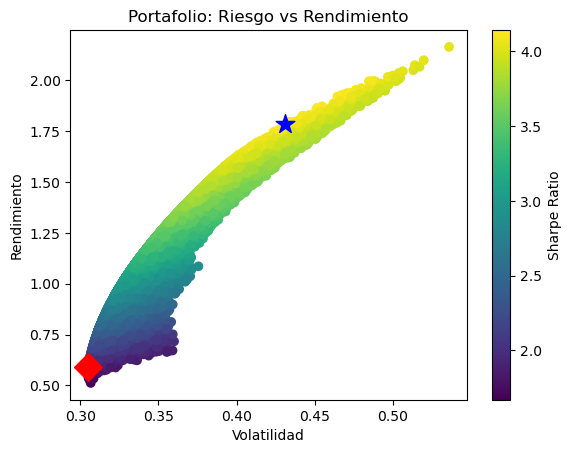

In [23]:
%matplotlib inline

#queremos graficar volatilidad (x) vs rendimiento (y)
plt.scatter(x=df_simulacion['volatilidad'],y=df_simulacion['rend'],c=df_simulacion['Sharpe_Ratio'],
            cmap='viridis')
plt.title('Portafolio: Riesgo vs Rendimiento')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')

#vamos agregar un símbolo para identificar el punto (portafolio) con MaxSR y otro para identificar 
#el de mínima varianza

plt.scatter(max_sharpe[1],max_sharpe[0],marker='*',color='b',s=200)
plt.scatter(min_vol[1],min_vol[0],marker='D',color='r',s=200)
plt.show()


## Método de Optimización Numérica.

# documentación
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html

### Intuición

#### Usaremos un método de optimización de programación cuadrática.
1. Nuestra función objetivo es cuadrática, i.e. de la forma $x^{T}Ax$
2. Tenemos restricciones de igualdad (pesos deben sumar 1)
3. Tenemos restricciones de desigualdad (cada peso debe estar entre 0 y 1)

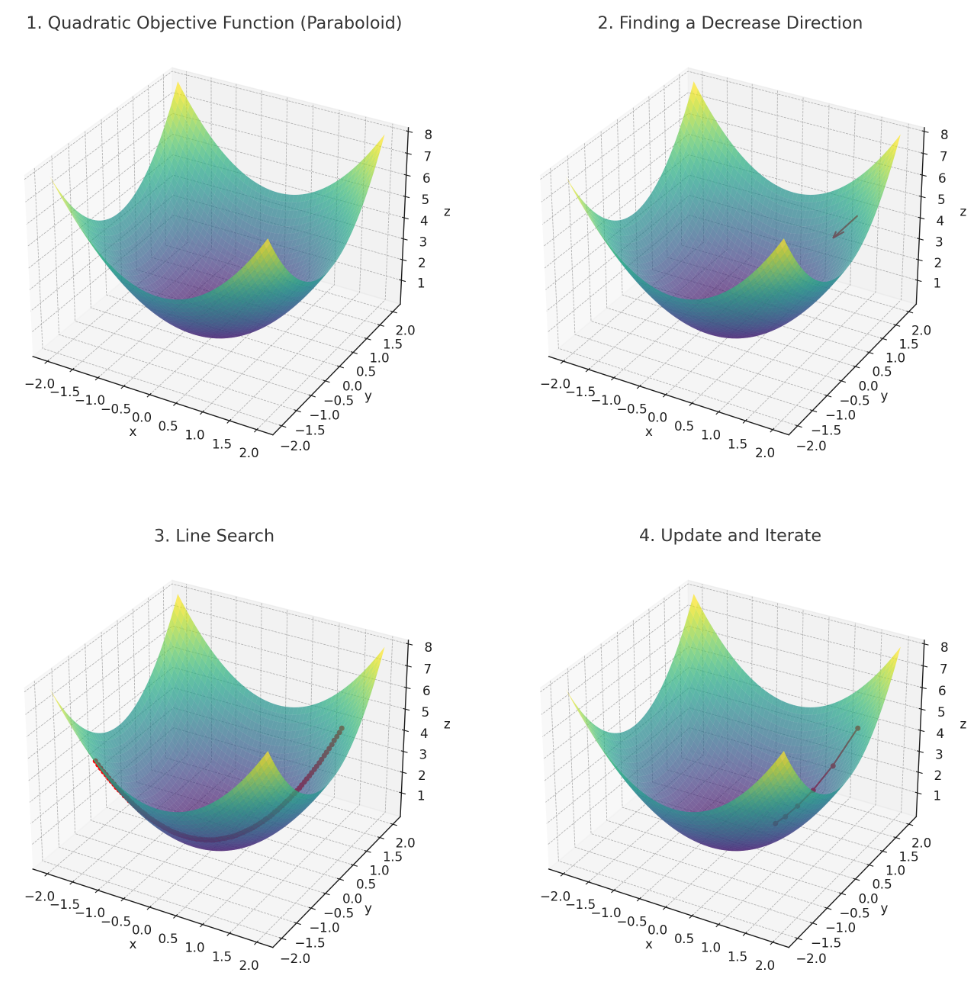

1. **Función Objetivo Cuadrática:** Esta gráfica ilustra la función objetivo cuadrática como una superficie en forma de paraboloide. Muestra la variación del valor de la función sobre las dimensiones $ x $ e $ y $.

2. **Encontrar una Dirección de Descenso en 3D:** Un vector (flecha roja) en esta gráfica indica el gradiente en un punto seleccionado. La dirección opuesta a este vector es la dirección de máximo descenso, donde el valor de la función disminuye. 

3. **Búsqueda de Línea en 3D:** Esta nueva gráfica representa el proceso de búsqueda de línea. Muestra el camino (línea roja) tomado sobre la superficie de la función objetivo durante la búsqueda de línea. El algoritmo explora diferentes tamaños de paso a lo largo de la dirección de descenso para encontrar el paso óptimo.

4. **Actualización e Iteración en 3D:** Esta gráfica demuestra los pasos iterativos del algoritmo. Comenzando desde un punto inicial, el camino (puntos rojos conectados por líneas) muestra cómo el algoritmo se mueve hacia el mínimo de la función, actualizando la posición en cada iteración.

##### Visto como curvas de nivel (proyección)

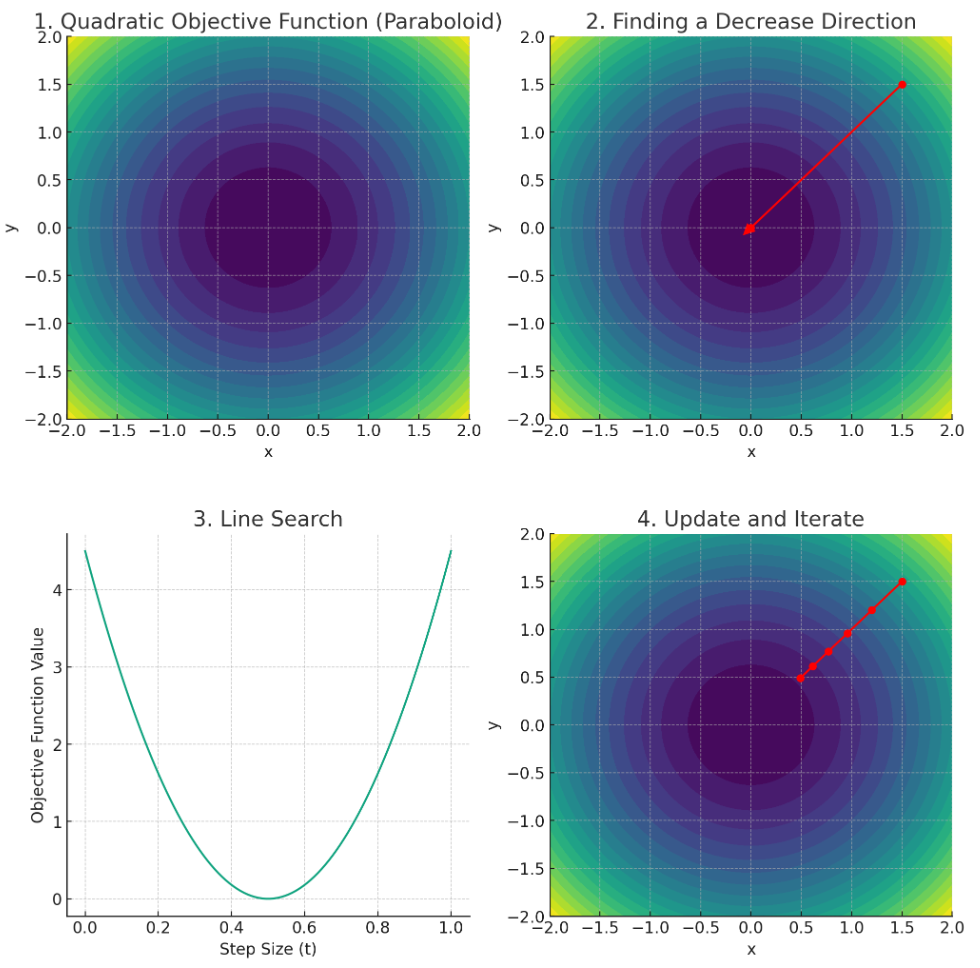

In [26]:
#utilizr scipy -> emplea optimizacion directa para resolver este problema. 
import scipy.optimize as optimize

In [ ]:
#1 scipy sólo minimiza ---> Si queremos maximizar el SR <--> min -SR
#2 usaremos el método de "SLSQP" (Sequential Least Squares Quadratic Programming)

#en nuestro caso h_i (restricciones adicionales) son los weights del portafolio (también pueden ser x_i)

# min (fx)
# s.t. h_i(x)=0 i=1,2,...m
# s.t. h_i(x)>=0  i=m+1, m+2, ...., 

#y además tenemos que: l_i <= x_i <= u_i,   i=1,...n (bounds)
#en nuestro caso particular l_i=0, u_i=1 para toda i

##### Sintaxis:
 `optimize.minimize(sharpe_negativo, w_0, method= 'SLSQP', bounds = b, constraints = c)`

In [36]:
#De la siguiente fnción vamos a obtener el sharpe_negativo, rendimientos y volatilidades. 

def obten_metricas(weights): 
    #convertir los pesos en un numpy array: 
    weights=np.array(weights)
    #rendimientos
    ret=np.sum(rend.mean()*weights)*252

    #volatilidad
    vol=np.sqrt(np.dot(weights.T,np.dot(rend.cov()*252,weights)))

    #Sharpe Ratio 

    sr=ret/vol

    return np.array([ret,vol,sr])


In [37]:
def sharpe_negativo(weights): #obtenemos el -SR
    return -obten_metricas(weights)[2]
def verifica_pesos(weights):
    return np.sum(weights)-1

In [34]:
w0

[0.25, 0.25, 0.25, 0.25]

In [38]:
w0=numero_de_acciones*[1/numero_de_acciones]

bounds=tuple((0,1) for i in range(numero_de_acciones))

constraints=({"type":"eq","fun":verifica_pesos})

max_sharpe_value=optimize.minimize(sharpe_negativo,w0,method='SLSQP',
                                   bounds=bounds,
                                   constraints=constraints)

In [39]:
max_sharpe_value

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -4.15083602023064
       x: [ 3.187e-01  5.022e-16  0.000e+00  6.813e-01]
     nit: 6
     jac: [-1.436e-03  7.180e-01  9.957e-01  6.703e-04]
    nfev: 32
    njev: 6

#### También podemos querer máximizar rendimiento sujeto a un nivel de riesgo fijo:

$$
\underset{\mathbf{w}}{\text{max}} \ \mathbf{w}^T \mathbf{r} \\\\ s.t. \mathbf{w}^T \Sigma \mathbf{w} = c  \\\ s.t. \sum_{i}{w_i} = 1
$$

para alguna c constante. 

max A equivale a minimizar -A